In [20]:
# импорт необходимых библиотек
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Создание датасетов

## Датасеты с «качественными» данными

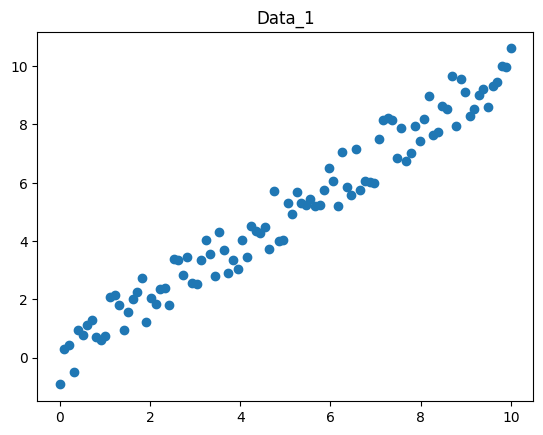

In [21]:
# Датасет №1
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Data_1")
plt.show()

Обучим модель линейной регрессии

In [22]:
model = LinearRegression()
model.fit(xs1.reshape(-1, 1), ys1)

LinearRegression()

Анализ качества предсказания

Mean squared error: 0.34
R-squared (R2) Score: 0.96


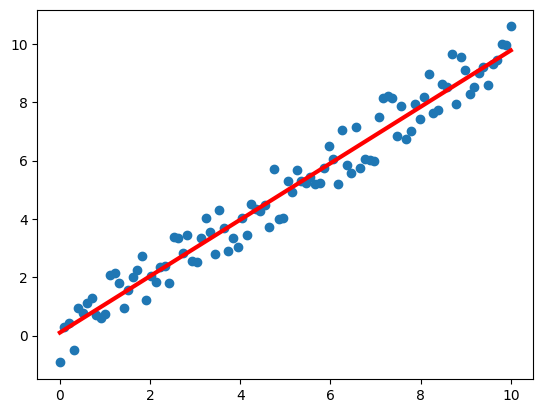

In [23]:
df_1 = model.predict(xs1.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys1, df_1))
print('R-squared (R2) Score: %.2f' % r2_score(ys1, df_1))

plt.scatter(xs1, ys1)
plt.plot(xs1.reshape(-1,1), df_1, color='red', linewidth=3)
plt.show()
np.savetxt('ys1.csv', ys1, delimiter = ',')
np.savetxt('df_1.csv', df_1, delimiter = ',')

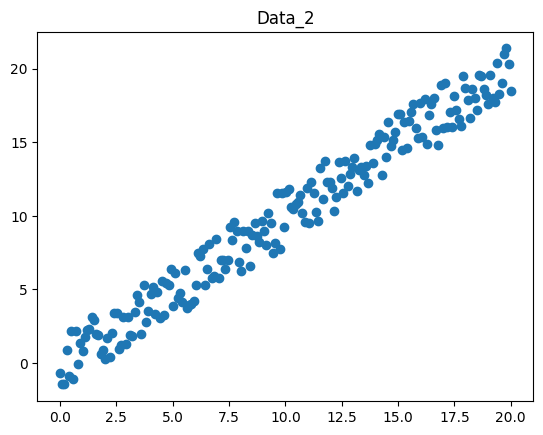

In [29]:
# Датасет №2
xs2 = np.linspace(0, 20, 200)
ys2 = xs2 + np.random.random(200)*4 - 2
plt.scatter(xs2, ys2)
plt.title("Data_2")
plt.show()

Анализ качества предсказания

Mean squared error: 1.42
R-squared (R2) Score: 0.96


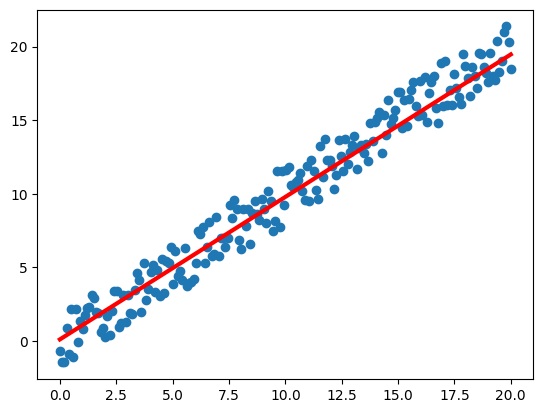

In [30]:
df_2 = model.predict(xs2.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys2, df_2))
print('R-squared (R2) Score: %.2f' % r2_score(ys2, df_2))

plt.scatter(xs2, ys2)
plt.plot(xs2.reshape(-1,1), df_2, color='red', linewidth=3)
plt.show()
np.savetxt('ys2.csv', ys2, delimiter = ',')
np.savetxt('df_2.csv', df_2, delimiter = ',')

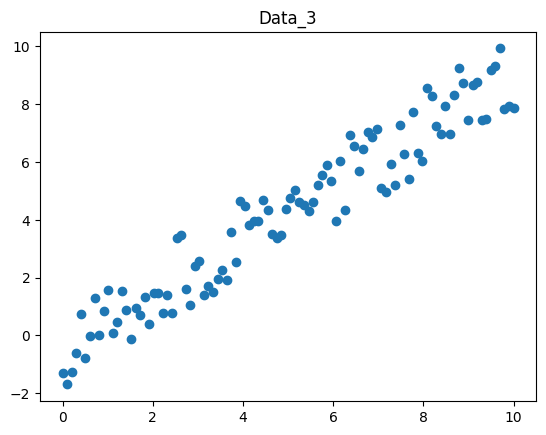

In [45]:
# Датасет №3
xs3 = np.linspace(0, 10, 100)
ys3 = 0.95*xs3 + np.random.random(100)*3 - 2
plt.scatter(xs3, ys3)
plt.title("Data_3")
plt.show()

Анализ качества предсказания

Mean squared error: 1.18
R-squared (R2) Score: 0.86


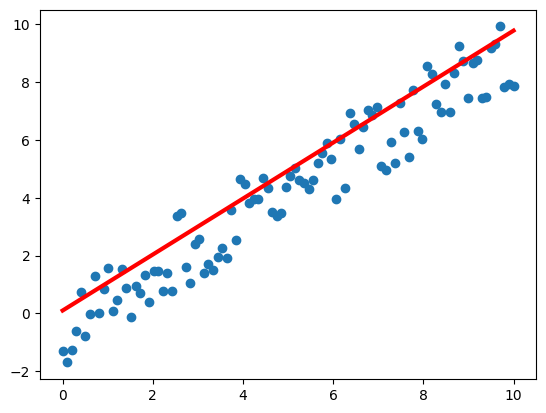

In [46]:
df_3 = model.predict(xs3.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys3, df_3))
print('R-squared (R2) Score: %.2f' % r2_score(ys3, df_3))

plt.scatter(xs3, ys3)
plt.plot(xs3.reshape(-1,1), df_3, color='red', linewidth=3)
plt.show()
np.savetxt('ys3.csv', ys3, delimiter = ',')
np.savetxt('df_3.csv', df_3, delimiter = ',')

## Датасет с шумом в данных

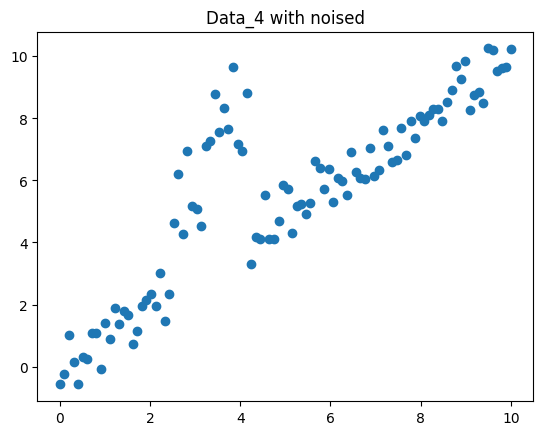

In [34]:
# Датасет №4
xs4 = np.linspace(0, 10, 100)
ys4 = xs4 + np.random.random(100)*2 - 1
ys4[25:42] *= 2
plt.scatter(xs4, ys4)
plt.title("Data_4 with noised")
plt.show()

Анализ качества предсказания

Mean squared error: 2.61
R-squared (R2) Score: 0.71


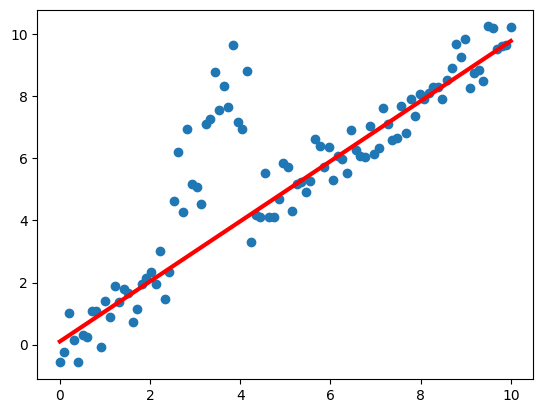

In [35]:
df_4 = model.predict(xs4.reshape(-1, 1))
print('Mean squared error: %.2f' % mean_squared_error(ys4, df_4))
print('R-squared (R2) Score: %.2f' % r2_score(ys4, df_4))

plt.scatter(xs4, ys4)
plt.plot(xs3.reshape(-1,1), df_4, color='red', linewidth=3)
plt.show()
np.savetxt('ys4.csv', ys4, delimiter = ',')
np.savetxt('df_4.csv', df_4, delimiter = ',')

# Pytest

Датасет №1

In [36]:
%%writefile test_score1.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys1():
    ys1 = np.loadtxt('ys1.csv', delimiter=',')
    return(ys1)
@pytest.fixture()
def load_approx():
    df_1 = np.loadtxt('df_1.csv', delimiter=',')
    return(df_1)
def test_mse(load_ys1, load_approx):
    assert mean_squared_error(load_ys1, load_approx) < 2
def test_r2(load_ys1, load_approx):
    assert r2_score(load_ys1, load_approx) > 0.8


Writing test_score1.py


In [37]:
!pytest -v test_score1.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score1.py::test_mse PASSED                                          [ 50%]
test_score1.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.57s ===============================


Ошибок нет

Датасет №2

In [39]:
%%writefile test_score2.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys2():
    ys2 = np.loadtxt('ys2.csv', delimiter=',')
    return(ys2)
@pytest.fixture()
def load_approx():
    df_2 = np.loadtxt('df_2.csv', delimiter=',')
    return(df_2)
def test_mse(load_ys2, load_approx):
    assert mean_squared_error(load_ys2, load_approx) < 2
def test_r2(load_ys2, load_approx):
    assert r2_score(load_ys2, load_approx) > 0.8


Writing test_score2.py


In [40]:
!pytest -v test_score2.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score2.py::test_mse PASSED                                          [ 50%]
test_score2.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.47s ===============================


Ошибок нет

Датасет №3

In [49]:
%%writefile test_score3.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys3():
    ys3 = np.loadtxt('ys3.csv', delimiter=',')
    return(ys3)
@pytest.fixture()
def load_approx():
    df_3 = np.loadtxt('df_3.csv', delimiter=',')
    return(df_3)
def test_mse(load_ys3, load_approx):
    assert mean_squared_error(load_ys3, load_approx) < 2
def test_r2(load_ys3, load_approx):
    assert r2_score(load_ys3, load_approx) > 0.8


Overwriting test_score3.py


In [50]:
!pytest -v test_score3.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score3.py::test_mse PASSED                                          [ 50%]
test_score3.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.41s ===============================


Ошибок нет

Датасет №4

In [51]:
%%writefile test_score4.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
@pytest.fixture()
def load_ys4():
    ys4 = np.loadtxt('ys4.csv', delimiter=',')
    return(ys4)
@pytest.fixture()
def load_approx():
    df_4 = np.loadtxt('df_4.csv', delimiter=',')
    return(df_4)
def test_mse(load_ys4, load_approx):
    assert mean_squared_error(load_ys4, load_approx) < 2
def test_r2(load_ys4, load_approx):
    assert r2_score(load_ys4, load_approx) > 0.8


Writing test_score4.py


In [53]:
!pytest -v test_score4.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score4.py::test_mse FAILED                                          [ 50%]
test_score4.py::test_r2 FAILED                                           [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys4 = array([-0.57733073, -0.23244082,  1.01963415,  0.158868  , -0.56521374,
        0.31870535,  0.2463743 ,  1.06949893, ...246673,  8.84208149,  8.50599031, 10.25188985,
       10.20176473,  9.53764445,  9.62729012,  9.6635142 , 10.23805292])
load_approx = array([0.10032531, 0.19814192, 0.29595853, 0.39377513, 0.49159174,
       0.58940835, 0.68722495, 0.7850

Тест отработал с ошибками по метрикам

Качество метрик ухудшается. Нужно переобучать новую модель.